In [1]:
from netin.models import PAHModel
from netin.models import PATCHModel
from netin.models import CompoundLFM
from netin.models import BarabasiAlbertModel
from netin.algorithms.hypothesis_testing import Janus

In [2]:
OUTPUT_DIR = 'inference_results'

In [3]:
N=100
m=2
f_m=0.2
h_m=0.5
h_M=0.5
seed=1234
g_pah = PAHModel(N=N, m=2, f_m=f_m, h_m=h_m, h_M=h_M, seed=seed)
g_pah = g_pah.simulate()

In [4]:
is_global = False
k_max = 10
k_log_scale = False
verbose = False
j = Janus(graph=g_pah, is_global=is_global, k_max=k_max, k_log_scale=k_log_scale, verbose=verbose)

In [5]:
h = j.get_uniform_hypothesis()
e = j.generate_evidences(h)
j.add_evidences(h.name, e)
del(h)

/home/espinl/.conda/envs/py39NetIn/lib/python3.9/site-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [6]:
h = j.get_self_loop_hypothesis()
e = j.generate_evidences(h)
j.add_evidences(h.name, e)
del(h)

In [7]:
h = j.get_data_hypothesis()
e = j.generate_evidences(h)
j.add_evidences(h.name, e)
del(h)

In [8]:
n_iter = 20
best_evidence = j.model_fitting(PAHModel, n_iter=n_iter,
                                N=N, m=2, f_m=f_m, h_m=h_m, h_M=h_M)
j.evidences.update(best_evidence)

In [9]:
best_evidence = j.model_fitting(BarabasiAlbertModel, n_iter=n_iter,
                                N=N, m=2)
j.evidences.update(best_evidence)

In [10]:
p_tc = 0.8
lfm_local = lfm_global = CompoundLFM.UNIFORM
best_evidence = j.model_fitting(PATCHModel, n_iter=n_iter,
                                N=N, m=2, f_m=f_m, h_m=h_m, h_M=h_M, p_tc=p_tc, lfm_local=lfm_local, lfm_global=lfm_global)
hname = list(best_evidence.keys())[0]
best_evidence[f'{hname}_{p_tc}'] = best_evidence.pop(hname)
j.evidences.update(best_evidence)

In [11]:
p_tc = 0.2
lfm_local = lfm_global = CompoundLFM.UNIFORM
best_evidence = j.model_fitting(PATCHModel, n_iter=n_iter,
                                N=N, m=2, f_m=f_m, h_m=h_m, h_M=h_M, p_tc=p_tc, lfm_local=lfm_local, lfm_global=lfm_global)
hname = list(best_evidence.keys())[0]
best_evidence[f'{hname}_{p_tc}'] = best_evidence.pop(hname)
j.evidences.update(best_evidence)

In [12]:
h = j.get_homophily_hypothesis(h_m=h_m, h_M=h_M)
e = j.generate_evidences(h)
j.add_evidences(h.name, e)
del(h)

In [13]:
h = j.get_homophily_hypothesis(h_m=1.0, h_M=1.0)
e = j.generate_evidences(h)
j.add_evidences(h.name, e)
del(h)

In [14]:
h = j.get_homophily_hypothesis(h_m=0.2, h_M=0.8)
e = j.generate_evidences(h)
j.add_evidences(h.name, e)
del(h)

In [15]:
h = j.get_homophily_hypothesis(h_m=0.2, h_M=0.2)
e = j.generate_evidences(h)
j.add_evidences(h.name, e)
del(h)

In [16]:
h = j.get_homophily_hypothesis(h_m=0.5, h_M=0.5)
e = j.generate_evidences(h)
j.add_evidences(h.name, e)
del(h)

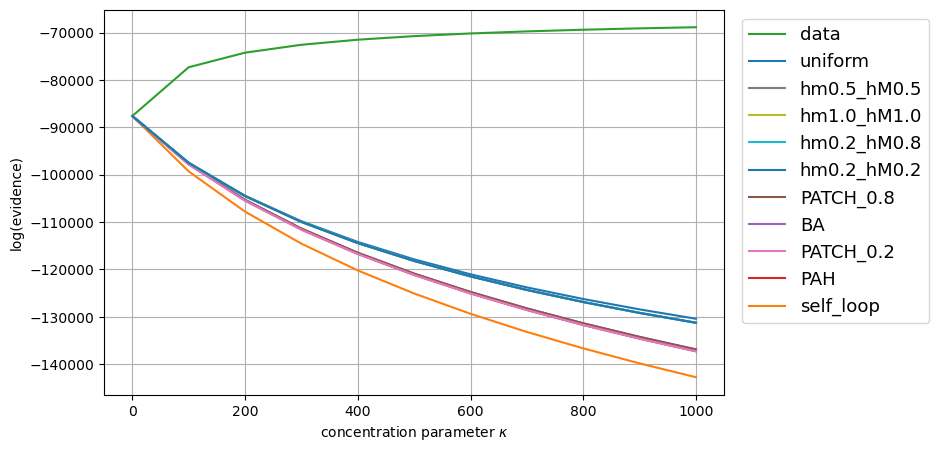

In [17]:
j.plot_evidences(output_dir=OUTPUT_DIR)

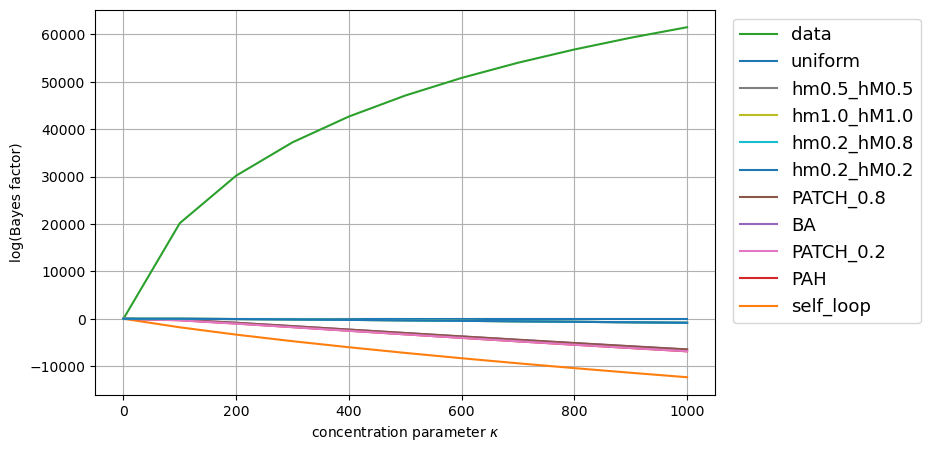

In [18]:
j.plot_evidences(bayes_factors=True, output_dir=OUTPUT_DIR)

In [19]:
j.save_evidences(OUTPUT_DIR)